# Mount the Google Drive before running any cell

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import numpy as np
import librosa
from scipy.io import wavfile
from statsmodels.tools import categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.layers import Input
from keras import backend as K
from keras.models import Model

# Applying ButterWorth Band Pass filter

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    y = lfilter(b, a, data)
    return y

In [ ]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 44100
lowcut = 600
highcut = 6000

# MFCC Feature Extraction Process
- No need to run the feature process.
- It has already been extracted and stored at directory

In [ ]:
def extract_features(path):

    features = np.array([], dtype='float32')

    files = [file for file in os.listdir(path)]

    i=0
    count=0
    print(os.path.basename(path))
    for file_name in files:

        unit = os.path.join(path,(str)(file_name))
        sample,sample_rate = librosa.load(unit, sr=44100)
        filter_data = butter_bandpass_filter(sample, lowcut, highcut, fs, order=3)

        i=i+1
        print((str)(i)+" files done.")

        mfccs = librosa.feature.mfcc(y=filter_data, sr=sample_rate, n_mfcc=26)     #frames (n_mfcc, track duration=600 all audio duration assuming)
        mfccs = librosa.feature.delta(mfccs)
        mfccs = np.transpose(mfccs) # ( frames, 26 )
        mfccs = np.lib.pad(mfccs,((0,1105-mfccs.shape[0]),(0,0)), mode = 'constant', constant_values=0)
        mfccs = mfccs[np.newaxis, :, :]

        if count==0:
            features = mfccs
            count = 1
        else:
            features = np.vstack((features, mfccs)) # ( number of files, frames=600, 26 )

    return np.array(features)

In [ ]:
# extracting the features
features = extract_features("./drive/My Drive/Thesis_new/dataset_slr")

dataset_slr
1 files done.
2 files done.
3 files done.
4 files done.
5 files done.
6 files done.
7 files done.
8 files done.
9 files done.
10 files done.
11 files done.
12 files done.
13 files done.
14 files done.
15 files done.
16 files done.
17 files done.
18 files done.
19 files done.
20 files done.
21 files done.
22 files done.
23 files done.
24 files done.
25 files done.
26 files done.
27 files done.
28 files done.
29 files done.
30 files done.
31 files done.
32 files done.
33 files done.
34 files done.
35 files done.
36 files done.
37 files done.
38 files done.
39 files done.
40 files done.
41 files done.
42 files done.
43 files done.
44 files done.
45 files done.
46 files done.
47 files done.
48 files done.
49 files done.
50 files done.
51 files done.
52 files done.
53 files done.
54 files done.
55 files done.
56 files done.
57 files done.
58 files done.
59 files done.
60 files done.
61 files done.
62 files done.
63 files done.
64 files done.
65 files done.
66 files done.
67 file

In [ ]:
features.shape

(1228, 1105, 26)

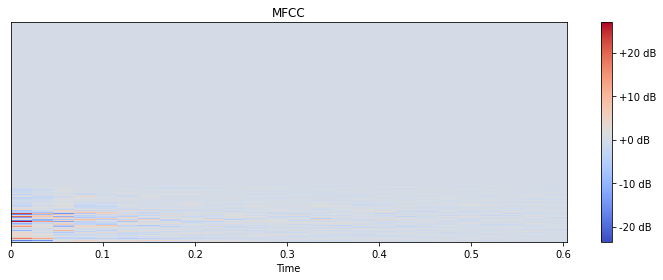

In [ ]:
import librosa.display
plt.figure(figsize=(10,4))
librosa.display.specshow(features[0], x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
# already saved into the drive. re-run if the feature extraction was re-done
np.save("mfcc_features_with_filter_sr44100", features)     # saving the extracted features in local drive

In [ ]:
audio = ('drive/My Drive/Thesis_new/dataset_slr/data_ (1).wav')

In [ ]:
y, sr = librosa.load(audio, sr=44100)

In [ ]:
Time = np.linspace(0, len(y) / fs, num=len(y))

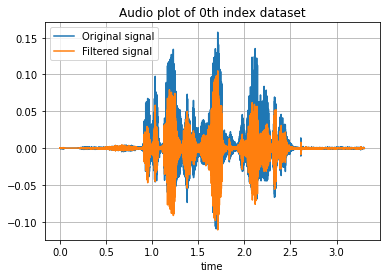

In [ ]:
# plotting the original audio and the filtered audio as test
plt.plot(Time,y, label='Original signal')
plt.plot(Time, filter_data, label='Filtered signal')
plt.xlabel('time')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Audio plot of 0th index dataset')
plt.show()

In [ ]:
mfccs = librosa.feature.mfcc(y=filter_data, sr=sr, n_mfcc=26)

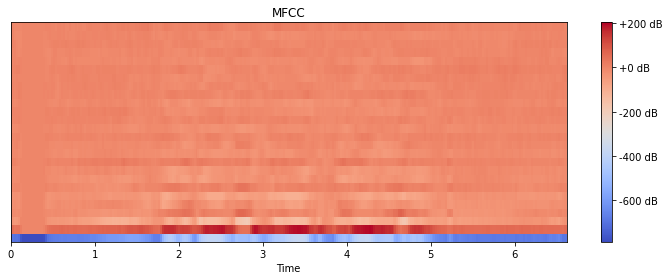

In [ ]:
import librosa.display
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

# Loading features from drive

In [ ]:
# loading features extracted from recorded audio
feature = dataset = np.load('drive/My Drive/Thesis_new/mfcc_features_with_filter_sr44100.npy')

In [ ]:
# Reading in the text dataset from recorded
with open("./drive/My Drive/Thesis_new/textdata_slr.txt", 'r', encoding='utf-8') as f:
    textdata = f.readlines()

# String to Number conversion

In [ ]:
# Removing excess punctuation and newline
import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))
textdata = [regex.sub('', h.split("\n")[0]) for h in textdata]

In [ ]:
chars = [" ", 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ','ण', 'त', 'थ', 'द', 'ध', 'न',
         'प', 'फ', 'ब', 'भ', 'म', 'य','र', 'ल', 'व', 'श','ष', 'स', 'ह' , "क्ष" , "त्र" , "ज्ञ" , 'अ', 'आ', 'इ', 'ई', 'उ',
         'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'ी', 'ि', 'ु', 'ू', 'ा', 'ँ', 'े', 'ै', 'ाे', 'ाै', 'ं', '्र', 'ृ']

In [ ]:
cnt=0
def get_label(ch):
    global cnt
    label = cnt
    cnt+=1
    return label
chr2lbl = {c:get_label(c) for c in list(chars)}
lbl2chr = {chr2lbl[c]:c for c in list(chars)}
def get_string2label(strval):
    idlist = []
    for c in list(strval):
        if c in chr2lbl:
            idlist.append(chr2lbl[c])
    return np.array(idlist)

def get_label2string(lblarr):
    strval = []
    for idv in lblarr:
        strval.append(lbl2chr[idv])
    return ''.join(strval)

In [ ]:
label = textdata

In [ ]:
label[150]

'यिनको अद्युत् प्रतिभा'

In [ ]:
# for encoding each text
b = [[]for i in range(1228)]
for i in range(1228):
    for j in range(10):
        encoded = get_string2label(label[i])
        b[i] = np.stack(encoded)

In [ ]:
b[150]

array([26, 48, 20,  1,  0, 37, 18, 26, 49, 16,  0, 21, 27, 16, 48, 24, 51])

In [ ]:
max_len = max([len(x) for x in b])
max_len

36

In [ ]:
new_arr = [np.pad(x, (0, max_len - len(x)), 'constant') for x in b]
type(new_arr)

list

In [ ]:
n_arr = np.array(new_arr)
n_arr[0]

array([37, 19, 48,  1, 51, 57, 30,  0, 24, 51,  3,  0, 24, 48, 27, 51, 28,
        0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

# Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, n_arr , test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(982, 1105, 26) (982, 36)
(246, 1105, 26) (246, 36)


In [ ]:
from __future__ import print_function
import numpy as np

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Dropout, Bidirectional, Embedding
#from keras.layers import Dropout, Bidirectional, BatchNormalization, Embedding, GRU

In [ ]:
nb_classes = max_len

In [ ]:
x_train.shape[1:]

(1105, 26)

# LSTM Model

- Need to use CTC loss function for audio data and run the model
- Need to compare the result of LSTM and BiLSTM model
- Need the text output and the word error rate for accuracy

In [ ]:
input_length = Input(shape=(1,), dtype='int64')
label_length = Input(shape=(1,), dtype='int64')


In [ ]:
inputs = Input(shape=x_train.shape[1:])
lstm_output = LSTM(600, activation='tanh')(inputs)
dense_output = Dense(nb_classes, activation='softmax')(lstm_output)

model = Model(inputs=inputs, outputs=dense_output)


In [ ]:
model.compile(loss='ctc', optimizer='adam')

In [ ]:
import tensorflow as tf
y_pred = tf.keras.layers.Softmax()(dense_output)

In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
from jiwer import wer

In [ ]:
def ctc_decode(y_pred):
    input_length = np.ones(y_pred.shape[0]) * y_pred.shape[1]
    decoded = K.ctc_decode(y_pred, input_length, greedy=True)[0][0]
    return decoded

In [ ]:
# Predict on the test set
predictions = model.predict(x_test)

# Perform CTC decoding on predictions
decoded_predictions = ctc_decode(predictions)

# Convert numerical labels to strings
predicted_strings = [get_label2string(decoded.numpy()) for decoded in decoded_predictions]

# Convert numerical labels of true labels to strings
true_strings = [get_label2string(true_label) for true_label in y_test]

# Calculate CER and WER
cer = np.mean([wer(true, pred) for true, pred in zip(true_strings, predicted_strings)])
wer = wer(true_strings, predicted_strings)

print("Character Error Rate (CER): {:.2%}".format(cer))
print("Word Error Rate (WER): {:.2%}".format(wer))

8/8 [==============================] - 1s 75ms/step


InvalidArgumentError: ignored